In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import datasets , linear_model
from sklearn.metrics import  mean_squared_error,  r2_score


In [46]:
#diabetes = datasets.load_diabetes()

In [47]:
#data = diabetes['data']
#data

In [48]:
#preditors = diabetes['target']

In [49]:
#preditors
datasets_X, datasets_y = datasets.load_diabetes(return_X_y=True, as_frame=True)


In [50]:
datasets_X.shape

(442, 10)

In [51]:
datasets_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [52]:
datasets_X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [53]:
datasets_X.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

<Axes: >

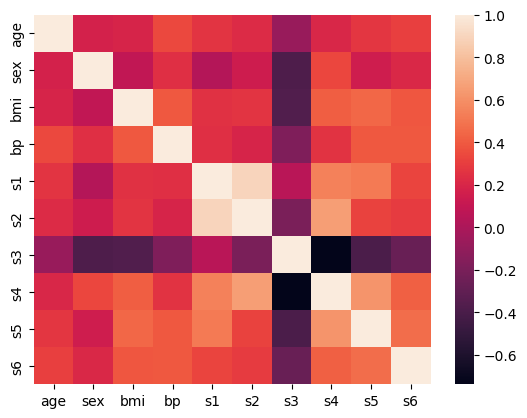

In [54]:
datasets_X.corr()

sns.heatmap(datasets_X.corr())


In [55]:
datafr = pd.concat([datasets_X, datasets_y], axis=1)

In [56]:
datafr.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [57]:
datafr.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [58]:
# Je supprime age , sex et  s2 
datasets_X.drop(['age', 'sex', 's1','s2'], axis=1,inplace=True)

In [59]:
datasets_X

,bmi,bp,s3,s4,s5,s6
0,0.061696,0.021872,-0.043401,-0.002592,0.019907,-0.017646
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068332,-0.092204
2,0.044451,-0.005670,-0.032356,-0.002592,0.002861,-0.025930
3,-0.011595,-0.036656,-0.036038,0.034309,0.022688,-0.009362
4,-0.036385,0.021872,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...
437,0.019662,0.059744,-0.028674,-0.002592,0.031193,0.007207
438,-0.015906,-0.067642,-0.028674,0.034309,-0.018114,0.044485
439,-0.015906,0.017293,-0.024993,-0.011080,-0.046883,0.015491
440,0.039062,0.001215,-0.028674,0.026560,0.044529,-0.025930


In [60]:
from sklearn.model_selection import train_test_split


In [61]:
X_train, X_test, y_train, y_test = train_test_split(datasets_X, datasets_y, test_size=0.3, random_state=42)

In [62]:
my_model = linear_model.LinearRegression()

In [63]:
my_model.fit(X_train,y_train)

LinearRegression()

In [64]:
predition = my_model.predict(X_test)

In [65]:
predition

array([143.78938718, 175.53194765, 159.99829318, 256.68159898,
       132.90099981,  95.74182529, 275.8565383 , 213.10174639,
        90.15068719, 135.06139427,  96.12937048, 141.41266039,
        61.75737286, 213.56802046, 110.29675814, 142.68447921,
       230.88511449, 248.99212604, 203.75409694, 221.48909642,
       199.44090469,  83.44254127,  59.17695533, 202.85085155,
       157.70740758, 175.21152619, 205.58604653, 177.20818868,
        42.61080468, 130.72848002, 177.06127592,  87.10323193,
       147.9557706 , 184.33324701, 164.28052437, 223.02125067,
       134.56492832, 131.95410899, 151.06490693,  49.995645  ,
        62.34681458, 118.51741455, 166.93593138, 142.01621112,
       161.6989349 ,  61.38772763,  74.38931275,  83.64604825,
        49.05541816, 149.33260077, 154.05046812,  64.77359549,
       120.65691016,  96.69405042, 177.75448085, 159.77188182,
        86.8149624 , 217.56514425, 114.11639548,  48.04087514,
       176.92640213, 191.78593431, 156.79750428, 117.67

In [66]:
# Les coefficients
print("Coefficients: \n", my_model.coef_)
# Le mean squared error


Coefficients: 
 [ 602.63901613  328.78075296 -332.94959761 -139.72763758  409.86289827
   36.8046029 ]


In [67]:
print("Mean squared error :  %.2f" %mean_squared_error(y_test,predition))

Mean squared error :  2872.87


In [68]:
print("Coed de determination : %.2f " % r2_score(y_test,predition))

Coed de determination : 0.47 


Text(0, 0.5, 'Date test')

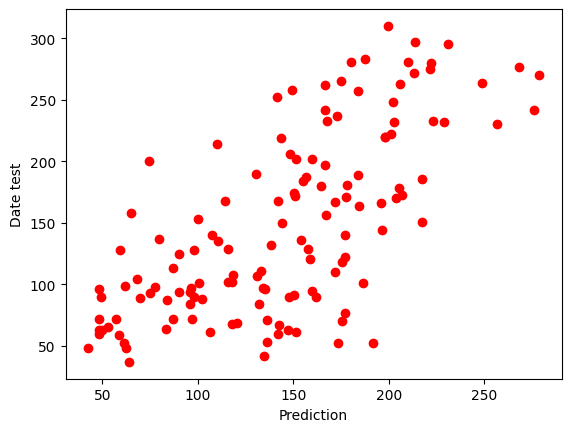

In [69]:
plt.scatter(predition,y_test , color="red" )
plt.xlabel("Prediction")
plt.ylabel("Date test")

In [70]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
# Load the diabetes dataset, which contains diabetes progression data and ten baseline variables
diabetes = load_diabetes()

# Extract features (input data) and target (output data)
X = diabetes.data  # Feature matrix containing independent variables
y = diabetes.target  # Target vector containing dependent variable

# Step 2: Split the data
# Split the data into training and testing sets for model evaluation
# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=42 sets a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the linear regression model
# Create an instance of the LinearRegression class for building a linear regression model
linear_model = LinearRegression()

# Fit (train) the linear regression model on the training data
linear_model.fit(X_train, y_train)

# Step 4: Make predictions
# Use the trained linear regression model to make predictions on the test data
y_pred = linear_model.predict(X_test)

# Step 5: Evaluate the model
# Calculate the Mean Squared Error (MSE) and R2 Score to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Calculate the Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate the R2 Score

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 2900.193628493482
R2 Score: 0.4526027629719195


Exercise: Performance Evaluation of a Regression Model (Using California Housing Prices Dataset)

Problem:
You have the California Housing Prices dataset, which contains housing data for various districts in California. Your task is to build a regression model to predict the median housing price for each district based on its features.

Steps:

Load the Dataset:

Import the fetch_california_housing function from sklearn.datasets.
Load the California Housing Prices dataset using fetch_california_housing().
Data Splitting:

Split the data into features (X) and target (y).
Use train_test_split to create training and testing sets.
Build the Model:

Import the LinearRegression class from sklearn.linear_model.
Create an instance of the LinearRegression class.
Train the model on the training data.
Make Predictions:

Use the trained model to make predictions on the test data.
Evaluate Model Performance:

Calculate the mean squared error (MSE) and the coefficient of determination R2 (R-squared) to evaluate the model's performance.

In [71]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the California Housing Prices dataset
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = linear_model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

# Step 6: Interpret predictions
print("Examples of Predicted and Actual Median Housing Prices:")
for i in range(5):
    print(f"Example {i+1}: Predicted = {y_pred[i]:.2f}, Actual = {y_test[i]:.2f}")


Mean Squared Error: 0.5558915986952422
R2 Score: 0.5757877060324524
Examples of Predicted and Actual Median Housing Prices:
Example 1: Predicted = 0.72, Actual = 0.48
Example 2: Predicted = 1.76, Actual = 0.46
Example 3: Predicted = 2.71, Actual = 5.00
Example 4: Predicted = 2.84, Actual = 2.19
Example 5: Predicted = 2.60, Actual = 2.78


In [72]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the classification model
classifier = LogisticRegression(max_iter=1000)  # You can replace this with another classifier
classifier.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = classifier.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression


# Load the Phishing Email dataset
df = pd.read_csv('Phishing_Email.csv')

df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


Data Preprocessing¶

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [75]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [76]:
df.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [77]:
df.drop_duplicates(inplace=True)

In [78]:
x = df['Email Text']
y = df['Email Type']

Virzualisation

<Axes: xlabel='Email Type', ylabel='count'>

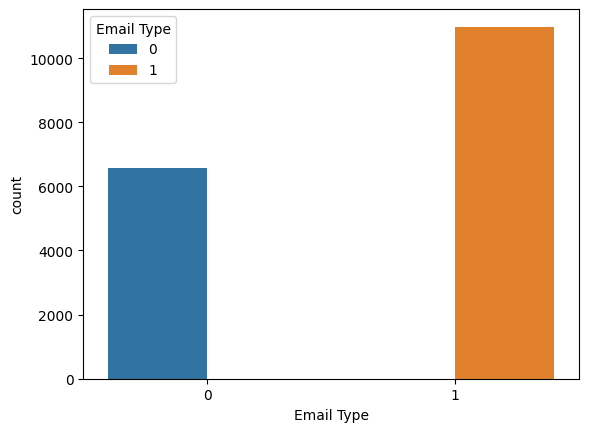

In [79]:
target = df['Email Type'].replace({'Safe Email':1, 'Phishing Email':0})
sns.countplot(x=target, hue=target)

**Train test spliting**

In [80]:
X_train, X_test, y_train, y_train = train_test_split(x,y, test_size=0.2, random_state=42)